Read libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Load data

In [8]:
df_high_demand_A = pd.read_csv('../Datasets/all_predictions_high_demand_A.csv', index_col=0)
df_products = pd.read_csv('../Datasets/clean_products.csv', index_col=0)
df_orders = pd.read_csv('../Datasets/clean_orders.csv', index_col = 0)
df_order_details = pd.read_csv('../Datasets/clean_order_details.csv', index_col=0)
df_inventory = pd.read_csv('../Datasets/clean_inventory.csv', index_col=0)
df_purchase = pd.read_csv('../Datasets/clean_purchase_orders.csv', index_col=0)

In [5]:
df_high_demand_A

,ProductID,QuantitySold,EMA,ARIMA_Pred,SARIMAX_pred,Prophet_Pred
0,427,4.857143,0,4.285670,14.211439,9.105570
1,427,5.000000,0,4.014562,10.374345,2.980395
2,427,5.000000,0,3.700042,22.716741,1.497143
3,427,5.000000,0,3.397487,18.613228,7.151304
4,427,5.000000,0,3.091635,14.082778,15.805078
...,...,...,...,...,...,...
1040,637,1.000000,0,0.691502,-0.572119,2.733194
1041,637,1.000000,0,0.617997,-0.785911,2.716504
1042,637,1.000000,0,0.544587,-0.993054,2.699814
1043,637,1.000000,0,0.471154,-1.197035,2.683124


In [7]:
df_high_demand_A[df_high_demand_A['ProductID'].isin([599,309])]

,ProductID,QuantitySold,EMA,ARIMA_Pred,SARIMAX_pred,Prophet_Pred
705,599,28.0,0,28.209712,32.824260,23.906783
706,599,28.0,0,28.553125,38.183386,23.577795
707,599,28.0,0,28.981780,38.111502,23.248806
708,599,28.0,0,29.464782,38.064162,22.919818
709,599,28.0,0,29.982432,37.833514,22.590830
710,599,28.0,0,30.522172,37.615690,22.261841
711,599,28.0,0,31.075996,37.412532,21.932853
910,309,10.0,0,10.000000,10.008588,11.147502
911,309,10.0,0,10.000000,10.024931,11.523431
912,309,10.0,0,10.000000,10.049017,11.831477


We are going the study with two products:
- ProductID: 599
- ProductID: 309

###  ProductID: **509**

In [62]:
#df_509 = df_products[df_products['ProductID'] == 509]
df_509 = df_products[df_products['ProductID'] == 427]

In [63]:
df_509 = df_509.merge(df_inventory, on = 'ProductID')
df_509 = df_509.merge(df_purchase, on = 'PurchaseOrderID')
#df_509 = df_509.merge(df_order_details, on = 'ProductID')
#df_509 = df_509.merge(df_orders, on = 'OrderID')
df_509['OrderDate'] = pd.to_datetime(df_509['OrderDate'])
df_509['TransactionDate'] = pd.to_datetime(df_509['TransactionDate'])
df_509

,ProductID,ProductName,ModelDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,...,MissingID,TransactionDate,UnitPurchasePrice,QuantityOrdered,QuantityReceived,QuantityMissing,EmployeeID,OrderDate,ShippingMethod,SupplierName
0,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,0.0,2003-09-20,3.15,280.0,280.0,0.0,1,2003-09-20,Container,S1
1,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,0.0,2003-10-11,3.15,520.0,520.0,0.0,3,2003-10-11,Container,S1
2,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,0.0,2003-11-15,3.20,910.0,910.0,0.0,1,2003-11-15,Container,S1
3,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,0.0,2004-01-14,3.20,40.0,40.0,0.0,6,2004-01-14,Container,S1
4,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,0.0,2004-02-09,3.45,280.0,280.0,0.0,6,2004-02-09,Container,S1
5,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,0.0,2004-02-21,3.45,180.0,180.0,0.0,6,2004-02-21,Container,S1
6,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,0.0,2004-02-21,3.45,60.0,60.0,0.0,6,2004-02-21,Container,S1
7,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,0.0,2004-04-03,3.45,170.0,170.0,0.0,6,2004-04-03,Container,S1
8,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,0.0,2004-04-03,3.45,140.0,140.0,0.0,6,2004-04-03,Container,S1
9,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,0.0,2004-05-06,3.45,3.0,3.0,0.0,6,2004-05-06,Door to Door Service,S1


In [64]:
from math import ceil

In [66]:
lead_time = (df_509['TransactionDate'] - df_509['OrderDate']).dt.total_seconds() / 86400
lead_time = lead_time 
lead_time = max(lead_time)
lead_time

34.0

In [67]:
df_509 = df_509.merge(df_order_details, on = 'ProductID')
df_509 = df_509.merge(df_orders, on = 'OrderID')
df_509

,ProductID,ProductName,ModelDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,...,total_price,CustomerID,EmployeeID_y,ShippingMethodID,OrderDate_y,ShipDate,FreightCharge,DeliveryTime,OrderYear,OrderMonth
0,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,205.0,2,2,1,2003-07-11,2003-07-11,0.0,0,2003,7
1,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,205.0,2,1,1,2003-07-15,2003-07-15,0.0,0,2003,7
2,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,82.0,4,1,1,2003-07-14,2003-07-15,0.0,1,2003,7
3,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,102.5,5,1,1,2003-07-14,2003-07-14,0.0,0,2003,7
4,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,205.0,2,1,1,2003-07-18,2003-07-18,0.0,0,2003,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19306,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,29.5,186,16,1,2006-03-18,2006-03-18,0.0,0,2006,3
19307,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,7.3,245,16,1,2006-04-01,2006-04-01,31.0,0,2006,4
19308,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,7.0,246,14,1,2006-04-01,2006-04-01,31.0,0,2006,4
19309,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,162.0,231,14,1,2006-04-01,2006-04-01,0.0,0,2006,4


In [68]:
df_509 = df_509.rename(columns = {'OrderDate_y': 'OrderDate'})
df_509['OrderDate'] = pd.to_datetime(df_509['OrderDate'])
df_509

,ProductID,ProductName,ModelDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,...,total_price,CustomerID,EmployeeID_y,ShippingMethodID,OrderDate,ShipDate,FreightCharge,DeliveryTime,OrderYear,OrderMonth
0,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,205.0,2,2,1,2003-07-11,2003-07-11,0.0,0,2003,7
1,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,205.0,2,1,1,2003-07-15,2003-07-15,0.0,0,2003,7
2,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,82.0,4,1,1,2003-07-14,2003-07-15,0.0,1,2003,7
3,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,102.5,5,1,1,2003-07-14,2003-07-14,0.0,0,2003,7
4,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,205.0,2,1,1,2003-07-18,2003-07-18,0.0,0,2003,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19306,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,29.5,186,16,1,2006-03-18,2006-03-18,0.0,0,2006,3
19307,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,7.3,245,16,1,2006-04-01,2006-04-01,31.0,0,2006,4
19308,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,7.0,246,14,1,2006-04-01,2006-04-01,31.0,0,2006,4
19309,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,...,162.0,231,14,1,2006-04-01,2006-04-01,0.0,0,2006,4


In [69]:
sales_509 = df_509[['OrderDate', 'QuantitySold']]
sales_509

,OrderDate,QuantitySold
0,2003-07-11,50
1,2003-07-15,50
2,2003-07-14,20
3,2003-07-14,25
4,2003-07-18,50
...,...,...
19306,2006-03-18,5
19307,2006-04-01,1
19308,2006-04-01,1
19309,2006-04-01,27


In [70]:
sales_509 = sales_509.groupby(['OrderDate'])['QuantitySold'].sum().reset_index()
sales_509

,OrderDate,QuantitySold
0,2003-07-11,2050
1,2003-07-14,1845
2,2003-07-15,2050
3,2003-07-18,2050
4,2003-07-21,1640
...,...,...
320,2006-02-26,205
321,2006-03-01,82
322,2006-03-18,205
323,2006-04-01,1189


In [71]:
sales = sales_509.set_index('OrderDate')
sales = sales.asfreq('D')

sales['QuantitySold'] = sales['QuantitySold'].interpolate()
sales

,QuantitySold
OrderDate,
2003-07-11,2050.000000
2003-07-12,1981.666667
2003-07-13,1913.333333
2003-07-14,1845.000000
2003-07-15,2050.000000
...,...
2006-04-09,669.666667
2006-04-10,604.750000
2006-04-11,539.833333


In [72]:
mean_value = sales['QuantitySold'].mean()
mean_value

np.float64(848.7162698412699)

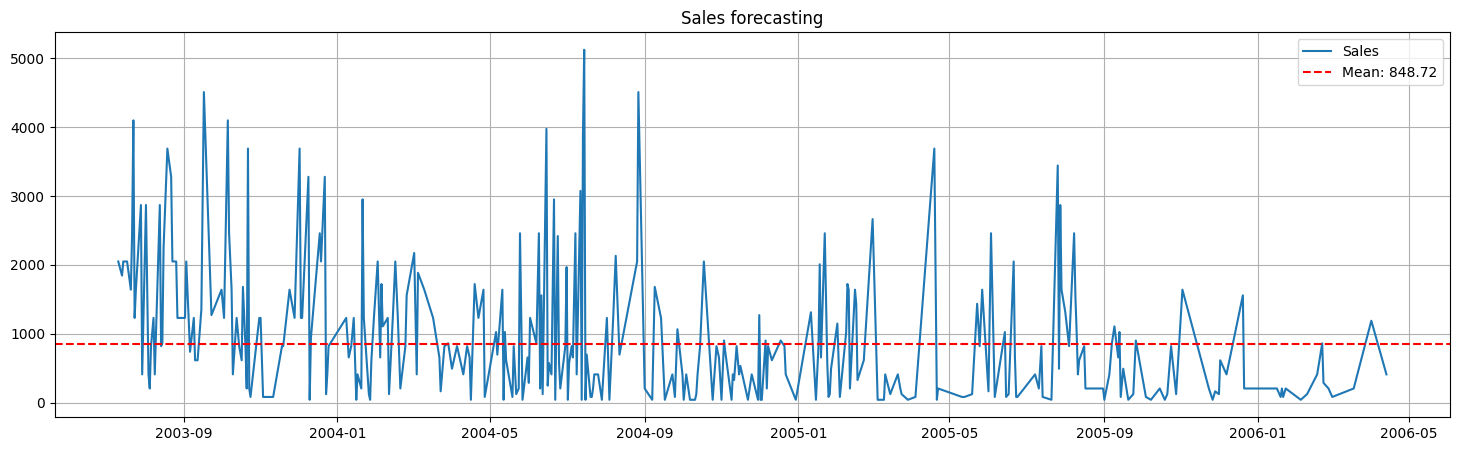

In [73]:
plt.figure(figsize=(18,5))
plt.plot(sales['QuantitySold'], linestyle="-", label = 'Sales')
plt.axhline(y=mean_value, color='r', linestyle="--", label=f"Mean: {mean_value:.2f}")
plt.title('Sales forecasting')
plt.legend()
plt.grid()
plt.show()

<Axes: ylabel='QuantitySold'>

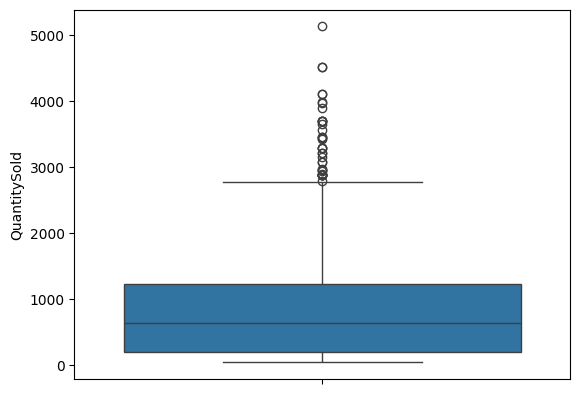

In [74]:
#estudio de valores atipicos
sns.boxplot(sales['QuantitySold'])

In [75]:

q1 = sales['QuantitySold'].quantile(0.25)
q3 = sales['QuantitySold'].quantile(0.75)

iqr = q3-q1

lim_inf = q1 - 1.5*iqr
lim_sup = q3 + 1.5*iqr

outliers = sales[(sales['QuantitySold'] < lim_inf) | (sales['QuantitySold'] > lim_sup)]

perc_out = (len(outliers) / len(sales['QuantitySold'])) * 100

print(f'Percentage outliers:  {perc_out}')

Percentage outliers:  3.7698412698412698


In [76]:
sales['QuantitySold_no_out'] = np.where((sales['QuantitySold'] < lim_inf) | (sales['QuantitySold'] > lim_sup),
                              sales['QuantitySold'].median(), sales['QuantitySold'])

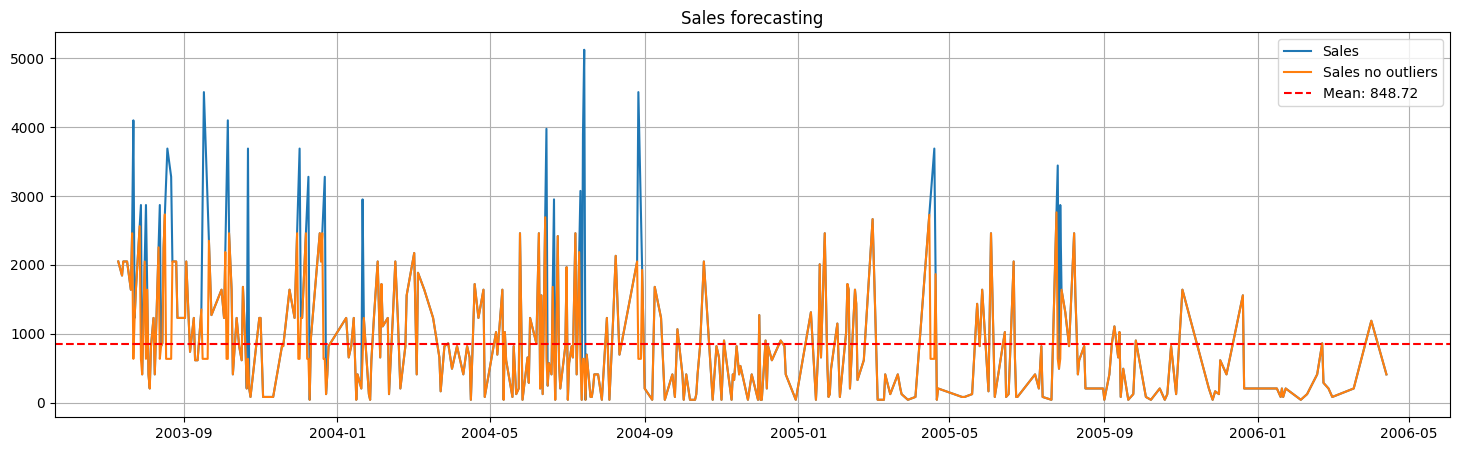

In [77]:

plt.figure(figsize=(18,5))
plt.plot(sales['QuantitySold'], linestyle="-", label = 'Sales')
plt.plot(sales['QuantitySold_no_out'], linestyle="-", label = 'Sales no outliers' )
plt.axhline(y=mean_value, color='r', linestyle="--", label=f"Mean: {mean_value:.2f}")
plt.title('Sales forecasting')
plt.legend()
plt.grid()
plt.show()

In [78]:
sales['QuantitySold'] = sales['QuantitySold_no_out']
sales.drop(columns=['QuantitySold_no_out'], inplace=True)

In [80]:
from scipy.stats import boxcox, norm, ks_2samp

p-value Kolmogorov-Smirnov: 0.0
p-value Shapiro-Wilk: 5.973458967758513e-25


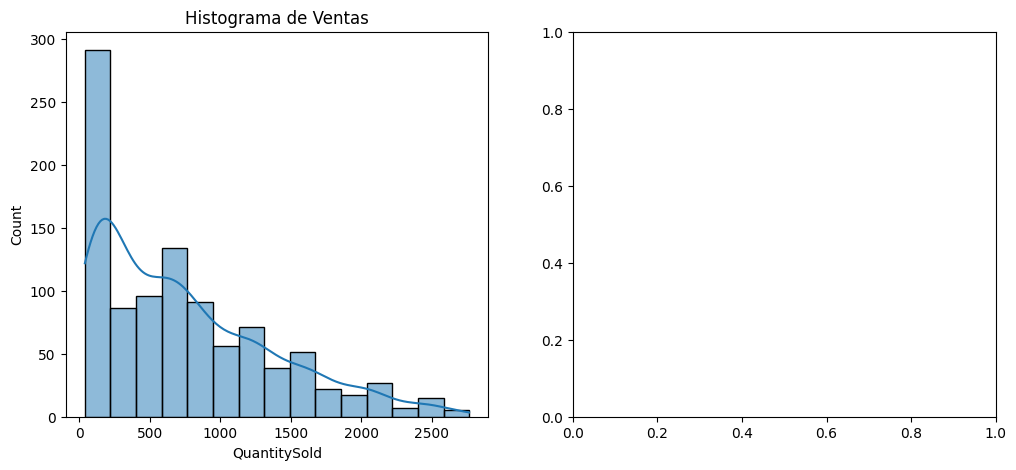

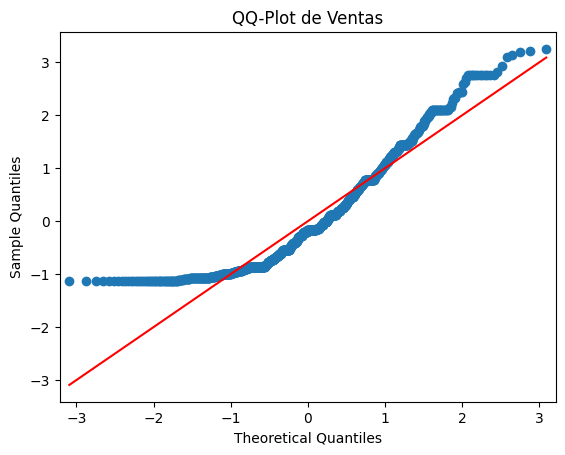

La serie NO es normal. Aplicando Box-Cox...
Lambda de Box-Cox: 0.27679044022109917


In [81]:
# comprobar la normalidad

from scipy.stats import shapiro, ks_2samp
from scipy.stats import norm
import statsmodels.api as sm

residuos = sales['QuantitySold']

# Test de Kolmogorov-Smirnov
ks_stat, p_ks = ks_2samp(residuos, norm.rvs(size=len(residuos)))
# Test de Shapiro-Wilk (para n < 5000)
shapiro_stat, p_shapiro = shapiro(residuos) if len(residuos) < 5000 else (None, None)

print(f"p-value Kolmogorov-Smirnov: {p_ks}")
print(f"p-value Shapiro-Wilk: {p_shapiro}")

# Histograma y QQ-Plot para ver distribución
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.histplot(residuos, kde=True)
plt.title("Histograma de Ventas")

plt.subplot(122)
sm.qqplot(residuos, line='s', fit=True)
plt.title("QQ-Plot de Ventas")
plt.show()

# Si p-valor < 0.05 en ambos test, la serie no es normal -> aplicar Box-Cox
if p_ks < 0.05 or (p_shapiro is not None and p_shapiro < 0.05):
    print("La serie NO es normal. Aplicando Box-Cox...")
    sales['QuantitySold'] = sales['QuantitySold'] + 1e-6
    sales['QuantitySold'], lambda_bc = boxcox(sales['QuantitySold'])
    print(f"Lambda de Box-Cox: {lambda_bc}")
else:
    print("La serie es normal. No es necesario aplicar Box-Cox.")
    

p-value Kolmogorov-Smirnov: 0.0
p-value Shapiro-Wilk: 5.973458967758513e-25


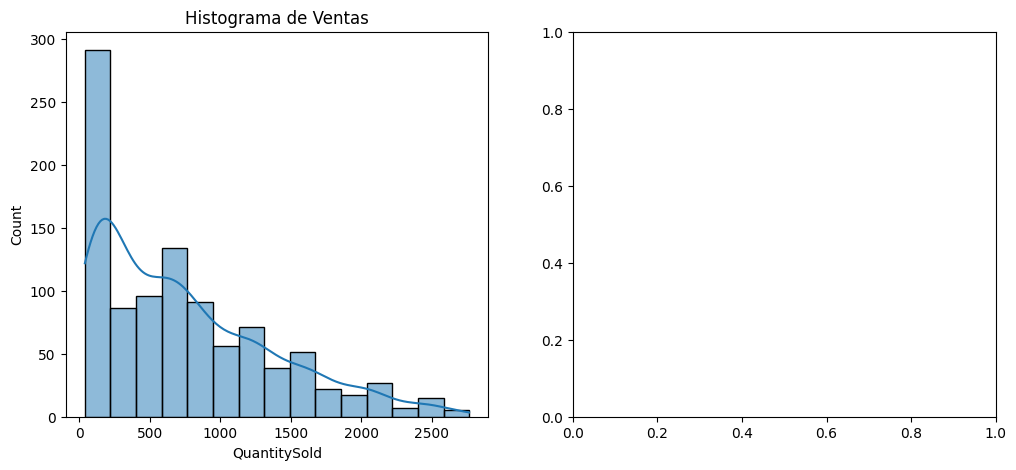

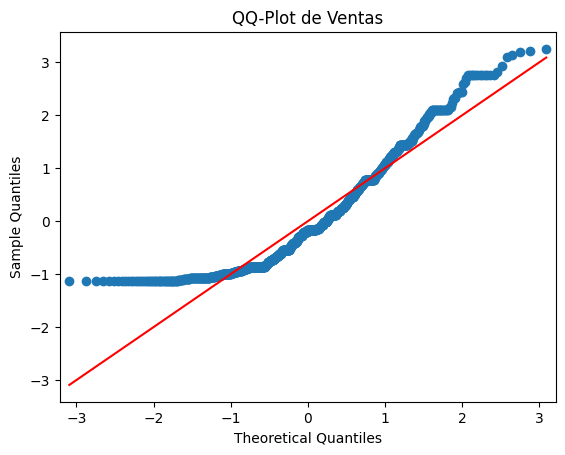

In [82]:
# Test de Kolmogorov-Smirnov
ks_stat, p_ks = ks_2samp(residuos, norm.rvs(size=len(residuos)))
# Test de Shapiro-Wilk (para n < 5000)
shapiro_stat, p_shapiro = shapiro(residuos) if len(residuos) < 5000 else (None, None)

print(f"p-value Kolmogorov-Smirnov: {p_ks}")
print(f"p-value Shapiro-Wilk: {p_shapiro}")

# Histograma y QQ-Plot para ver distribución
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.histplot(residuos, kde=True)
plt.title("Histograma de Ventas")

plt.subplot(122)
sm.qqplot(residuos, line='s', fit=True)
plt.title("QQ-Plot de Ventas")
plt.show()

In [ ]:
from scipy.stats import norm
from statsmodels.tsa.seasonal import seasonal_decompose

descomposicion = seasonal_decompose(sales["QuantitySold"], model="additive", period=30)
sales["DemandaEstacional"] = sales["QuantitySOl"] - descomposicion.seasonal
demanda_prom = sales["DemandaEstacional"].mean()
sigma_demanda = sales["DemandaEstacional"].std()
